In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# import the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [138]:
X = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = pd.DataFrame(cancer['target'], columns=['cancer'])

In [139]:
X.shape, y.shape

((569, 30), (569, 1))

In [140]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [128]:
y.isnull().sum()

cancer    0
dtype: int64

In [129]:
df = X.copy()
df['cancer'] = y['cancer']

In [130]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.3, random_state=42)
train.shape, test.shape

((398, 31), (171, 31))

# EDA

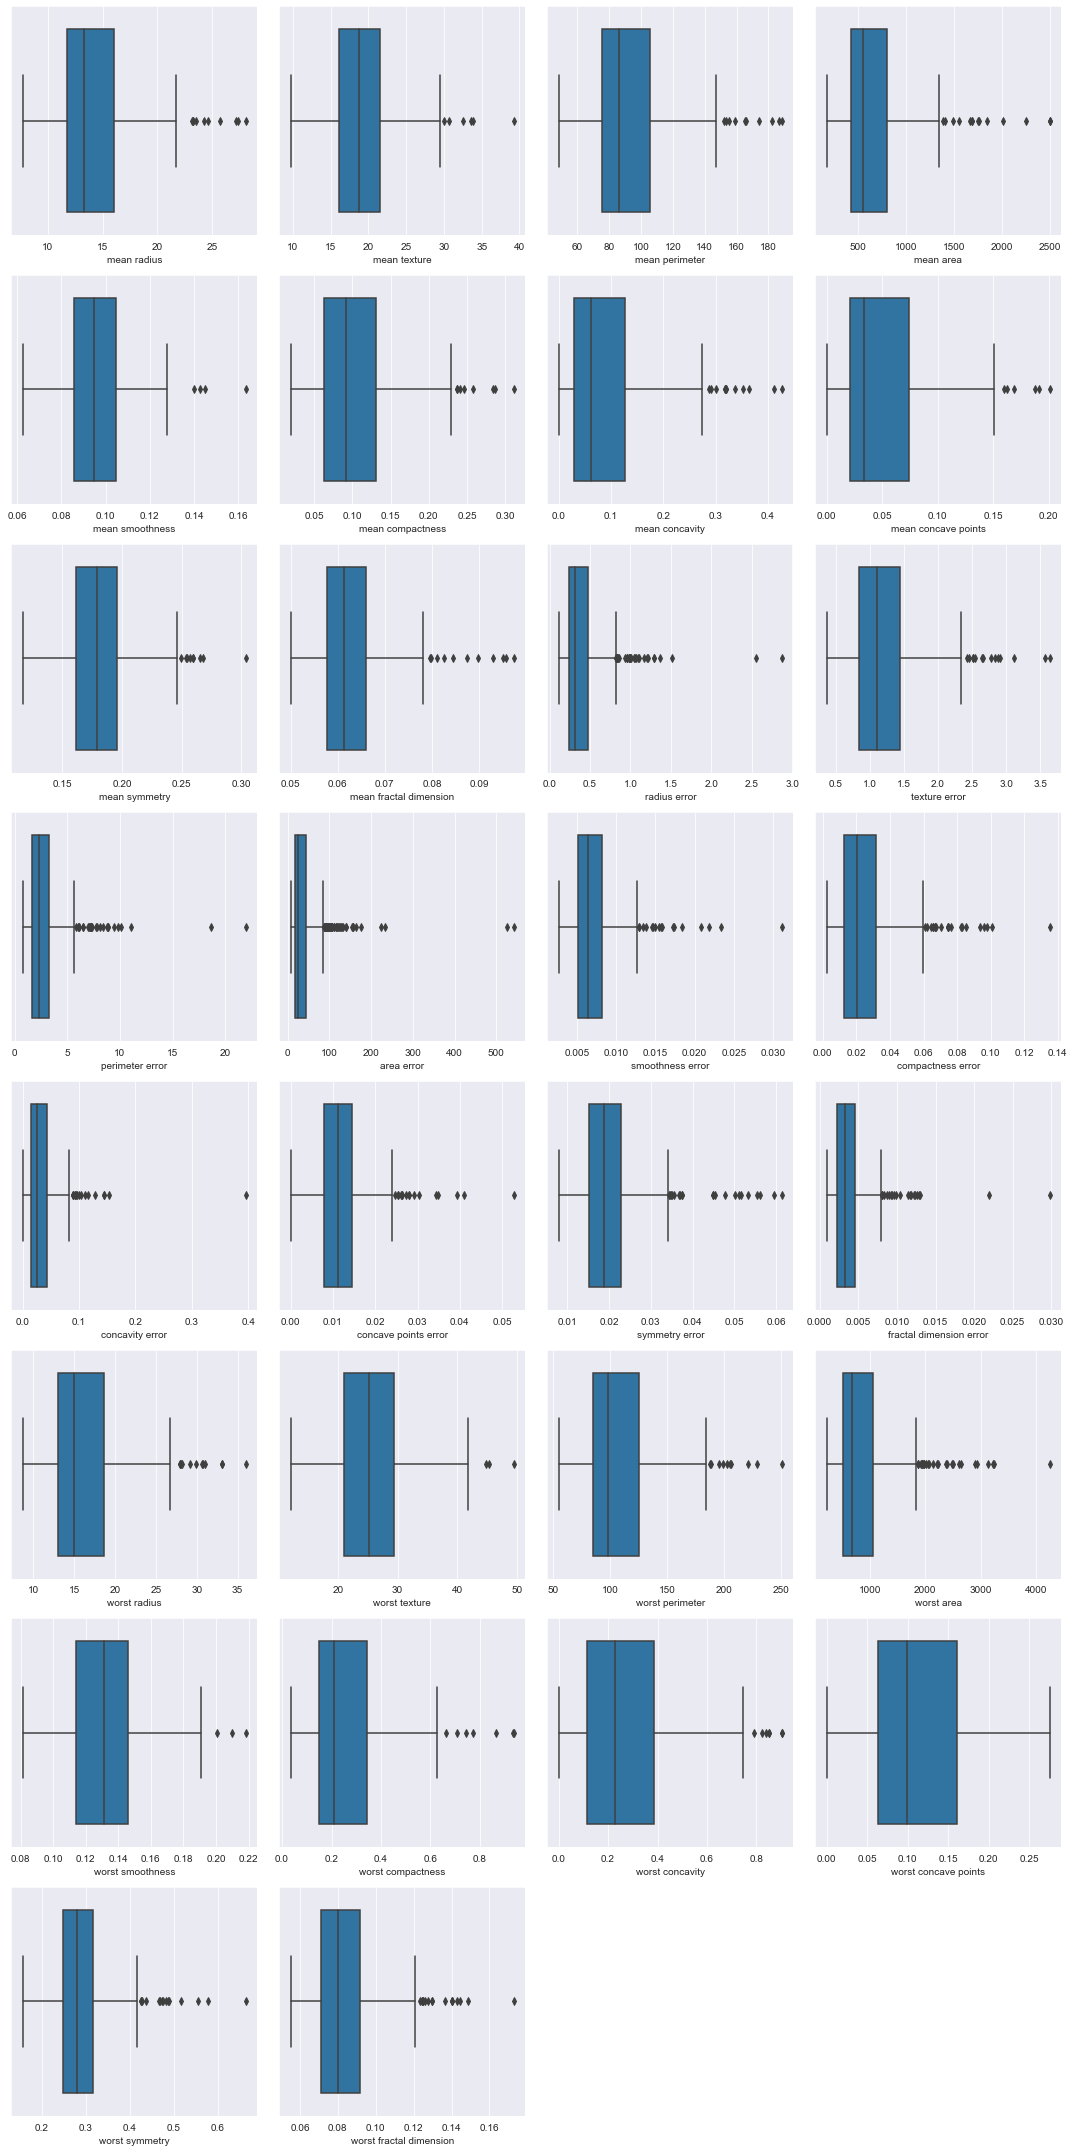

In [131]:
# check outliers 
sns.set_style('darkgrid')
fig, ax = plt.subplots(8, 4, figsize=(15, 30))
ax = ax.flatten()
fig.delaxes(ax[31])
fig.delaxes(ax[30])
for idx, col in enumerate(train.columns[:-1]):
    sns.boxplot(data=train, x=col, ax=ax[idx])

plt.tight_layout()
plt.show()

In [132]:
for dataset, name in zip([train, test], ['train', 'test']):
    outliers = {}
    outliers_idx = {}
    print(f'In {name}set: ')
    print('Number of outliers in: ')
    for col in dataset.columns:
        des = dataset[col].describe().T
        q25 = des['25%']
        q75 = des['75%']
        IQR = q75 - q25
        out = [i for i in dataset[col] if i < q25 - IQR*1.5 or i > q75 + IQR * 1.5]
        idx = [idx for idx, i in enumerate(dataset[col]) if i < q25 - IQR*1.5 or i > q75 + IQR * 1.5]
        outliers[col] = out
        outliers_idx[col] = idx

        for k in outliers_idx.keys():
            for v in outliers_idx[k]:
                if v in dataset.index:
                    dataset.drop(v, inplace=True)

        print(f'    {col}: {len(out)}')
    print('')

In trainset: 
Number of outliers in: 
    mean radius: 10
    mean texture: 6
    mean perimeter: 9
    mean area: 13
    mean smoothness: 4
    mean compactness: 8
    mean concavity: 10
    mean concave points: 6
    mean symmetry: 7
    mean fractal dimension: 8
    radius error: 27
    texture error: 12
    perimeter error: 22
    area error: 37
    smoothness error: 12
    compactness error: 18
    concavity error: 11
    concave points error: 10
    symmetry error: 16
    fractal dimension error: 15
    worst radius: 13
    worst texture: 2
    worst perimeter: 9
    worst area: 29
    worst smoothness: 3
    worst compactness: 6
    worst concavity: 5
    worst concave points: 0
    worst symmetry: 11
    worst fractal dimension: 8
    cancer: 0

In testset: 
Number of outliers in: 
    mean radius: 4
    mean texture: 0
    mean perimeter: 4
    mean area: 12
    mean smoothness: 2
    mean compactness: 7
    mean concavity: 5
    mean concave points: 7
    mean symmetry: 4
   

/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
train.shape, test.shape

((252, 31), (137, 31))

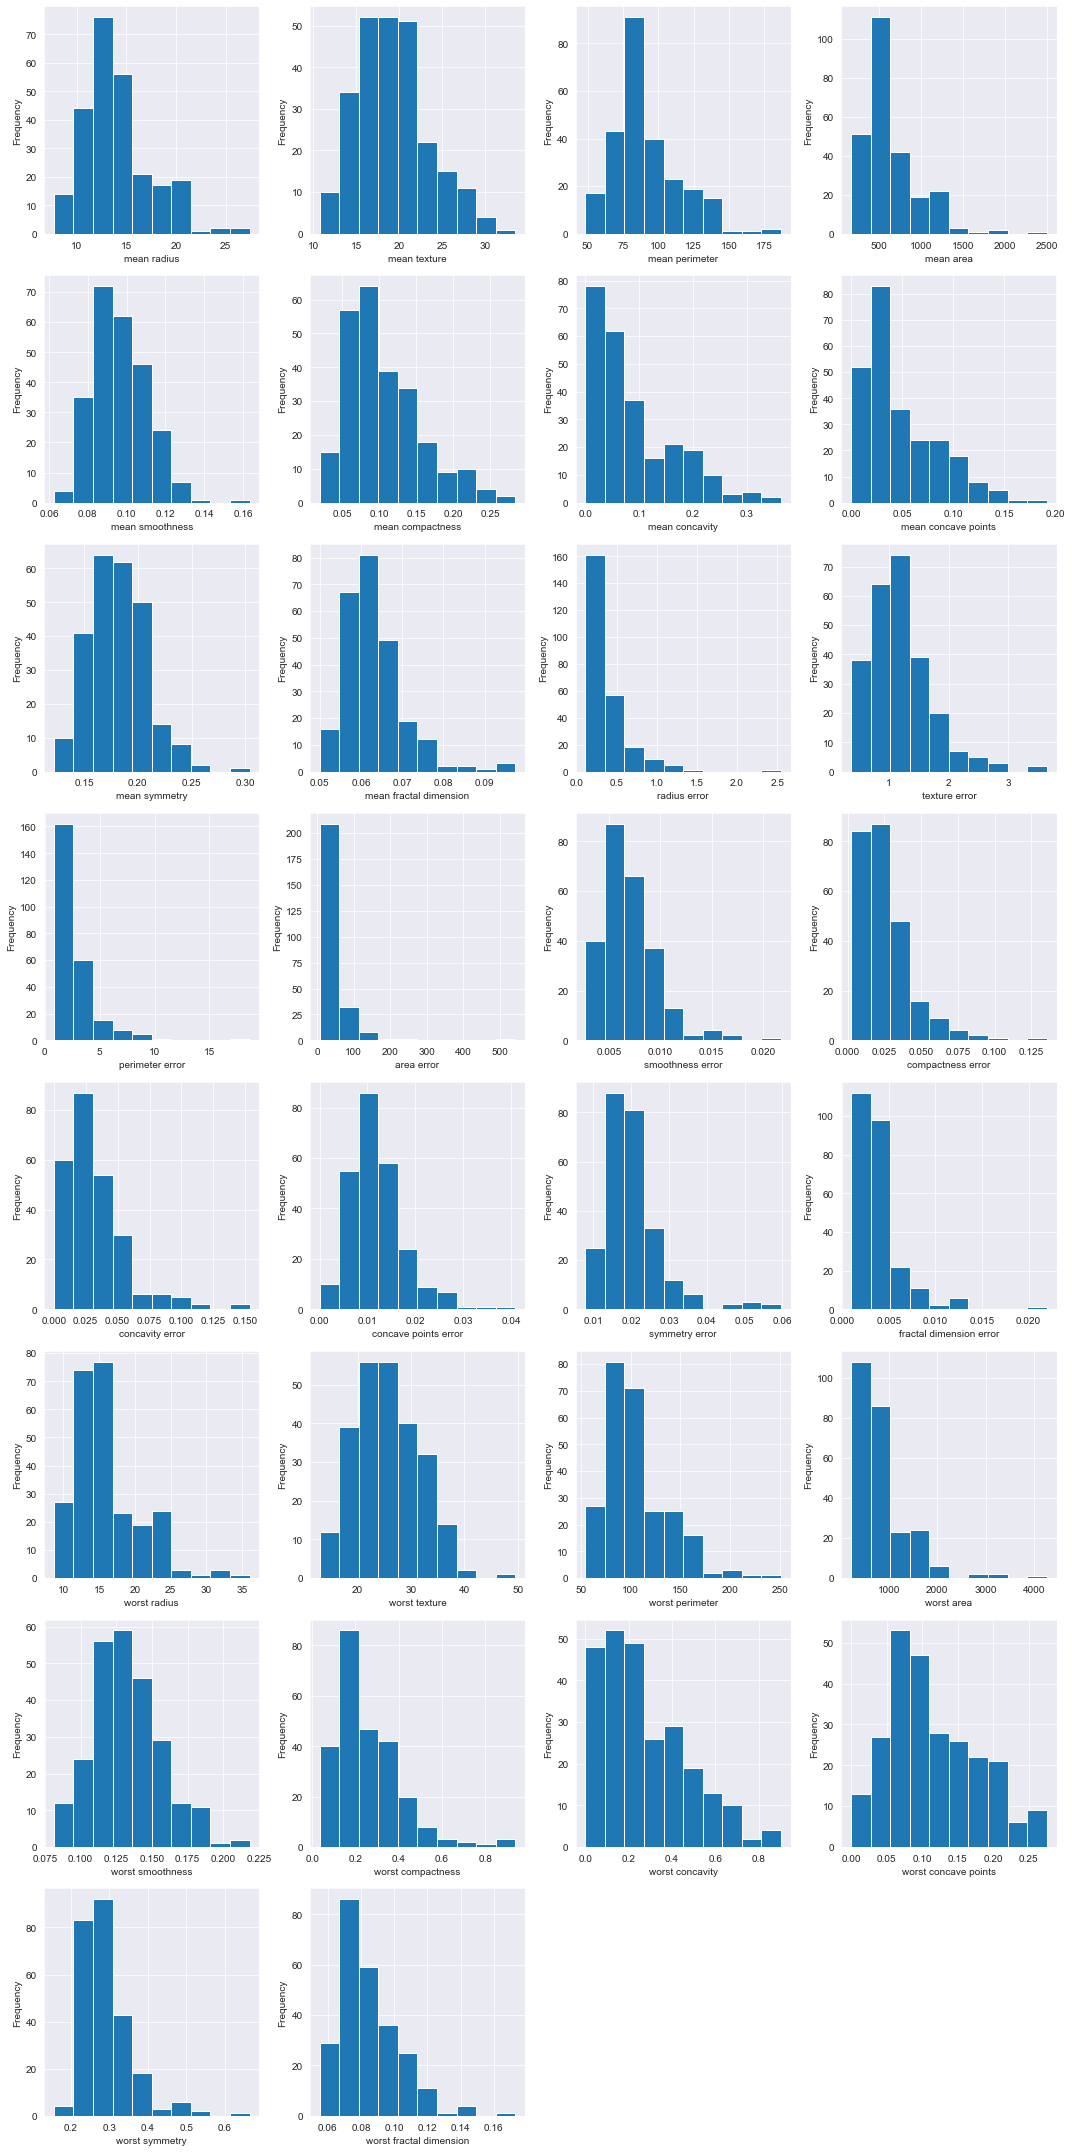

In [135]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(8, 4, figsize=(15, 30))
ax = ax.flatten()
fig.delaxes(ax[31])
fig.delaxes(ax[30])
for idx, col in enumerate(train.columns[:-1]):
    ax[idx].hist(data=train, x=col)
    ax[idx].set_xlabel(f'{col}')
    ax[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the features are just skewed to the right.

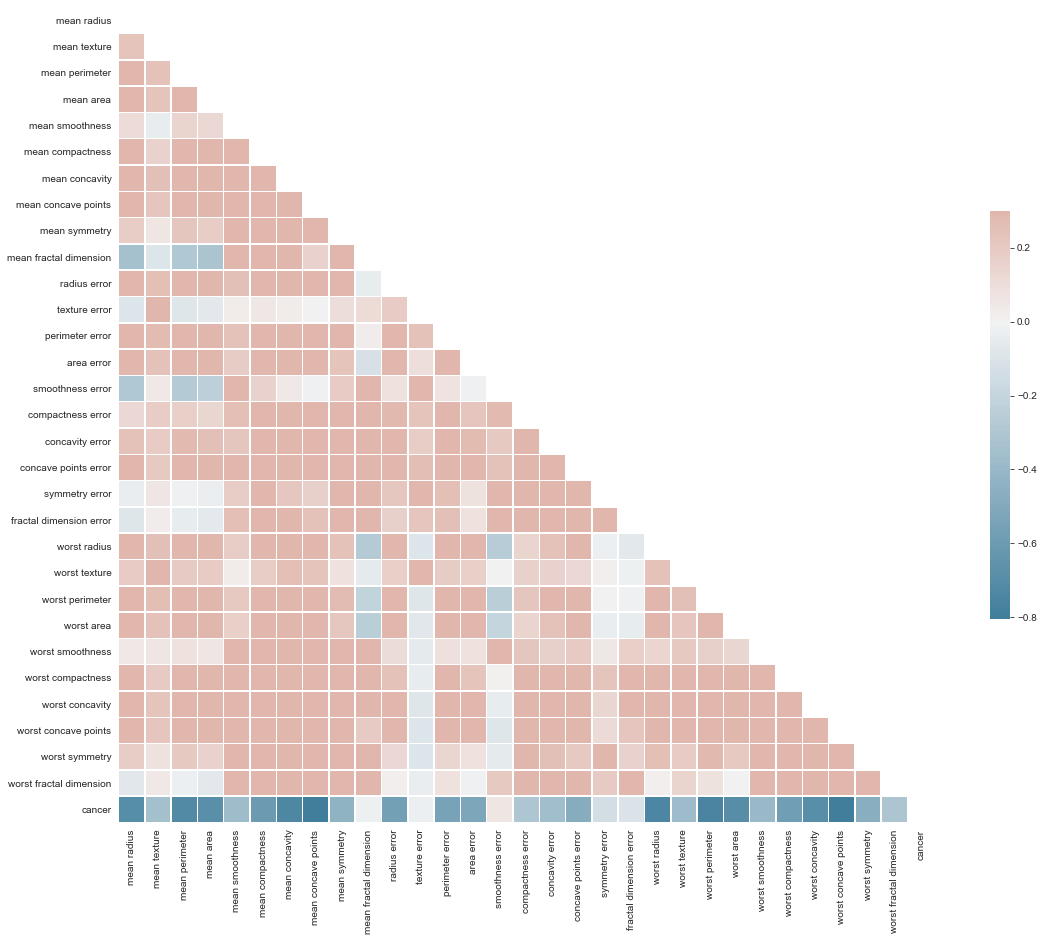

In [136]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20, 15))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

1) Most of the features share negative correlation with the target.

2) Most of the features share weak positive correlation with the target.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [142]:
X_no_outliners = train.drop('cancer', axis=1)
y_no_outliners = train['cancer']

X_train_no_outliners, X_test_no_outliners, y_train_no_outliners, y_test_no_outliners = train_test_split(X_no_outliners, y_no_outliners, test_size=.3, random_state=42)
y_train_no_outliners = y_train_no_outliners.values.ravel()
y_test_no_outliners = y_test_no_outliners.values.ravel()

X_train_no_outliners, X_val_no_outliners, y_train_no_outliners, y_val_no_outliners = train_test_split(X_train_no_outliners, y_train_no_outliners, test_size=.2, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, X_val = (pd.DataFrame(scaler.fit_transform(i), columns=i.columns) for i in [X_train, X_test, X_val])

In [143]:
X_train_no_outliners, X_test_no_outliners, X_val_no_outliners = (pd.DataFrame(scaler.fit_transform(i), columns=i.columns) for i in [X_train_no_outliners, X_test_no_outliners, X_val_no_outliners])

In [144]:
X_val_no_outliners.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.485886,-0.658514,-0.516778,-0.534601,0.352893,-0.614795,-0.758762,-0.734690,-0.368219,-0.578023,...,-0.579429,-1.036927,-0.607030,-0.576301,0.087656,-1.023929,-0.907302,-0.913943,-0.507029,-1.190175
1,1.504244,-0.007661,1.377946,1.537530,-1.232582,-0.460685,0.165269,0.544848,0.511262,-2.013114,...,1.242875,-0.673683,1.079016,1.199206,-1.319572,-0.808492,-0.206957,0.271935,0.101461,-1.846104
2,-0.342405,2.308937,-0.378808,-0.406431,-0.775881,-0.749555,-0.781539,-0.468717,-0.682603,-0.906090,...,-0.450795,1.987591,-0.503400,-0.485771,-1.242814,-0.911901,-0.888755,-0.590871,-0.863502,-1.495817
3,1.134914,0.480480,1.066276,1.056561,-0.463697,0.473565,0.060228,0.172304,0.610750,-0.418030,...,1.531325,1.460606,1.377844,1.553455,0.573789,1.372391,0.688565,1.126239,1.136060,0.857974
4,-0.799418,-1.405893,-0.792720,-0.759229,0.479170,-0.518219,-0.524907,-0.766114,-0.081691,0.375472,...,-0.834746,-0.886360,-0.789617,-0.751457,-0.048803,-0.494948,-0.211373,-0.663137,-0.087552,0.384057


In [49]:
X_val.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.068682,2.018905,2.040532,2.299362,-0.266201,0.124000,1.087430,1.174632,-1.426718,-0.833566,...,1.935190,1.966606,1.928529,2.177184,-0.356690,0.129865,0.741744,0.816962,-0.724895,-0.064072
1,-0.004568,0.033663,0.014332,-0.115957,0.801530,0.239858,0.459224,0.606350,-0.552844,0.359212,...,0.226207,0.841549,0.285247,0.064753,1.341989,0.616793,0.702651,1.268205,0.231258,0.983040
2,1.640062,1.725603,1.656640,1.691756,0.505144,0.868241,1.626102,1.575488,0.368480,-0.046734,...,1.762682,1.713554,1.830875,1.865386,2.078082,0.781515,1.558125,1.345122,0.333059,0.591905
3,-0.655435,0.496644,-0.668715,-0.656089,0.185047,-0.443705,-0.705013,-0.742449,-0.477715,-0.079310,...,-0.548930,0.046486,-0.602395,-0.538407,0.849807,-0.088558,-0.600106,-0.615907,-0.723606,0.036304
4,2.059157,0.479676,1.951581,2.255722,-0.861938,-0.345716,0.133672,0.472833,-1.351589,-1.353527,...,1.877687,0.049905,1.894855,1.920161,-0.334912,-0.141655,0.240137,0.615270,-0.981329,-0.630040


# Baseline Model

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier, XGBClassifier

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
models = [LogisticRegression(), 
          KNeighborsClassifier(),
          RandomForestClassifier(), 
          AdaBoostClassifier(), 
          GradientBoostingClassifier(),
          XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
          XGBRFClassifier(use_label_encoder=False, eval_metric='logloss')]
acc = {}
for model in models:
    name_str = str(model).split('(')[0]
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    acc[name_str] = score
    
acc = pd.DataFrame(acc, index=['acc']).T
acc.sort_values('acc', ascending=False, inplace=True)
acc

,acc
LogisticRegression,0.971776
KNeighborsClassifier,0.968700
XGBClassifier,0.959325
RandomForestClassifier,0.953075
AdaBoostClassifier,0.946627
GradientBoostingClassifier,0.943651
XGBRFClassifier,0.927927


In [151]:
acc = {}
for model in models:
    name_str = str(model).split('(')[0]
    score = cross_val_score(model, X_train_no_outliners, y_train_no_outliners, cv=5).mean()
    acc[name_str] = score
    
acc = pd.DataFrame(acc, index=['acc']).T
acc.sort_values('acc', ascending=False, inplace=True)
acc

,acc
LogisticRegression,0.964286
RandomForestClassifier,0.928571
KNeighborsClassifier,0.928571
XGBClassifier,0.928571
AdaBoostClassifier,0.921429
XGBRFClassifier,0.892857
GradientBoostingClassifier,0.871429


Since models's performance become worse after the outliers got removed, we should just use the raw data to build our models.

# Hyperparameters tuning with custom loop functions

/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:123: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:128: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.

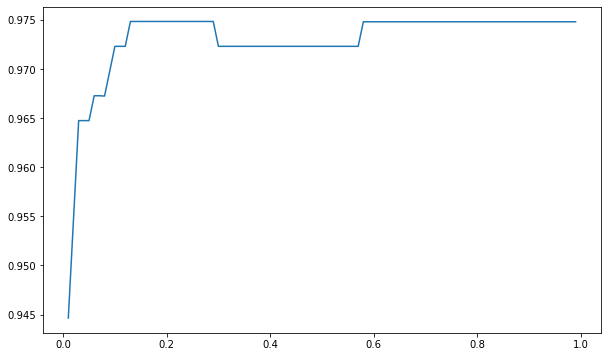

/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.01)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most 

Best Param: 0.0, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


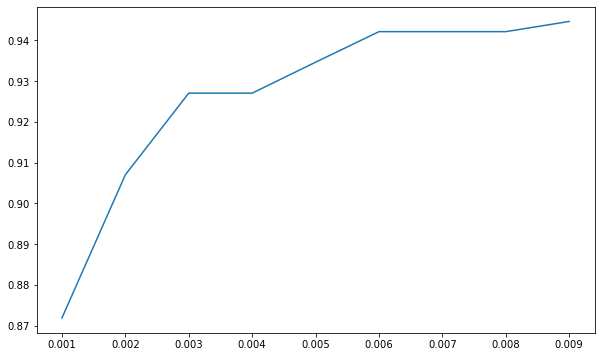

Best Param: -0.01, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most

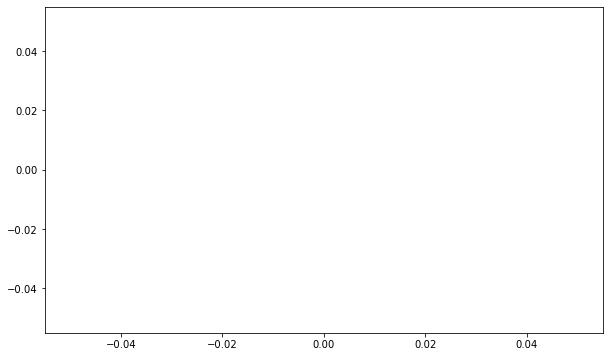

/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011099999999999999)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


Best Param: -0.011, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.010980000000000004)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


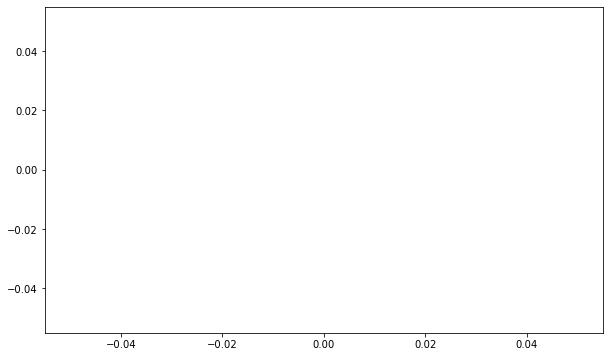

Best Param: -0.011099999999999999, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011109999999999998)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


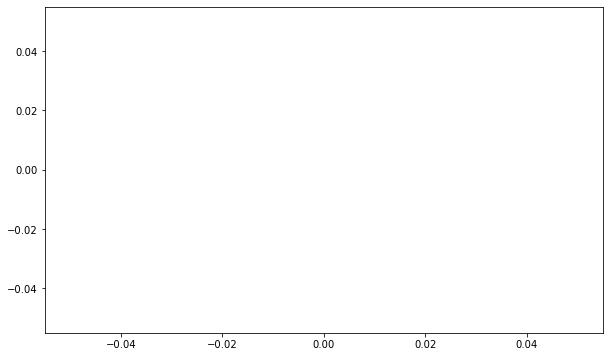

/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011110999999999998)

  warnings.warn("Estimator fit failed. The score on this train-test"


Best Param: -0.011109999999999998, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011110999999999998)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


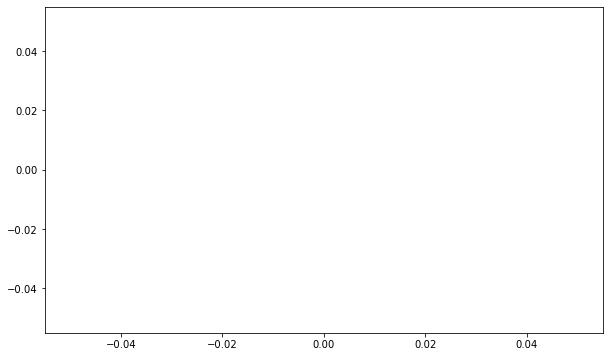

Best Param: -0.011110999999999998, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111099999999997)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


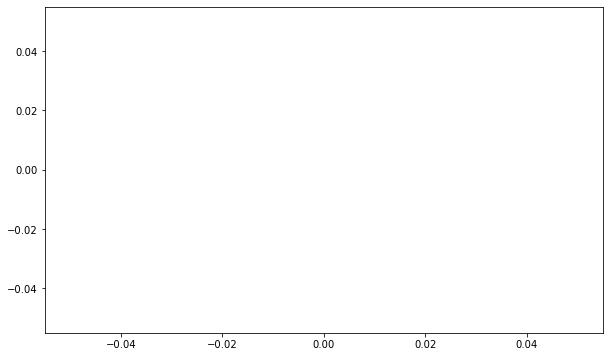

Best Param: -0.011111099999999997, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111109999999997)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


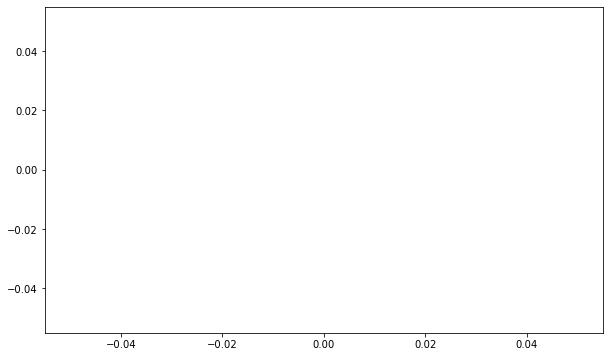

Best Param: -0.011111109999999997, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111110999999996)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


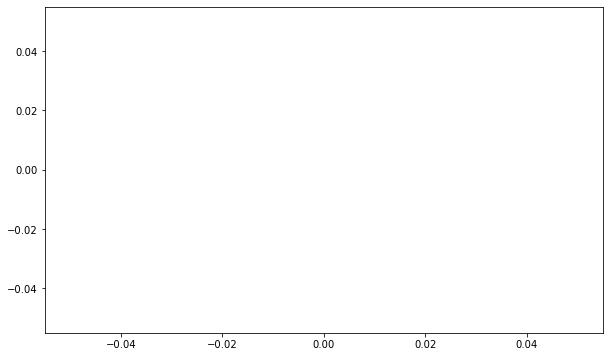

Best Param: -0.011111110999999996, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111099999996)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


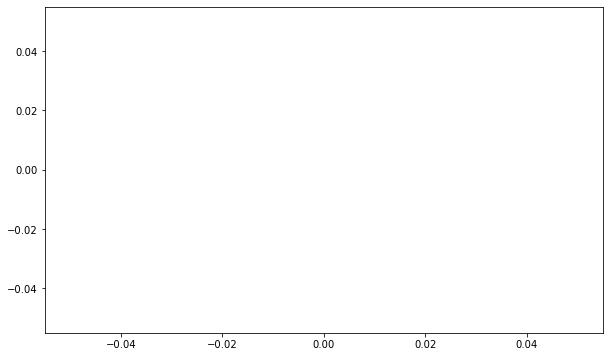

Best Param: -0.011111111099999996, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111109999997)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


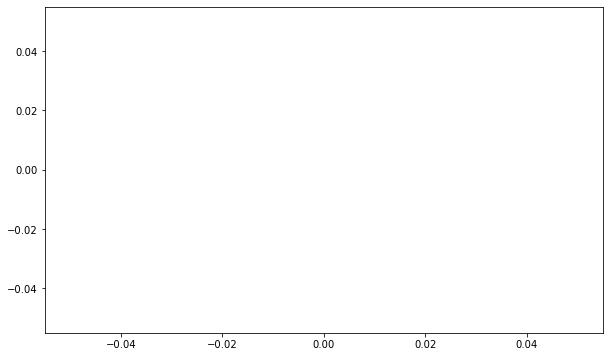

Best Param: -0.011111111109999997, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111110999997)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


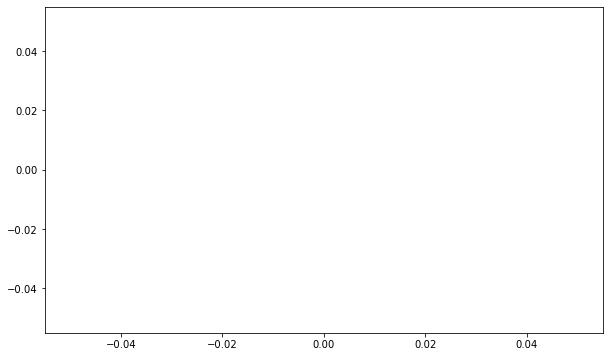

Best Param: -0.011111111110999997, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111111099997)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


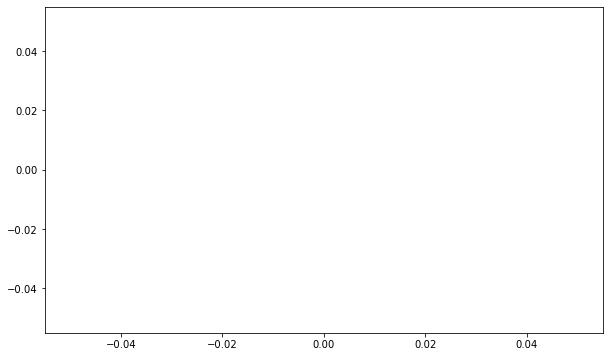

Best Param: -0.011111111111099997, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111111109998)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


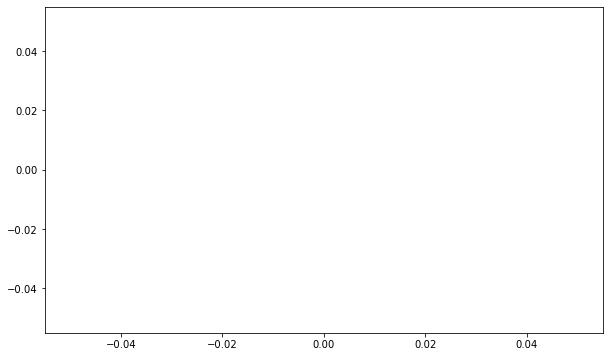

Best Param: -0.011111111111109998, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111111110997)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


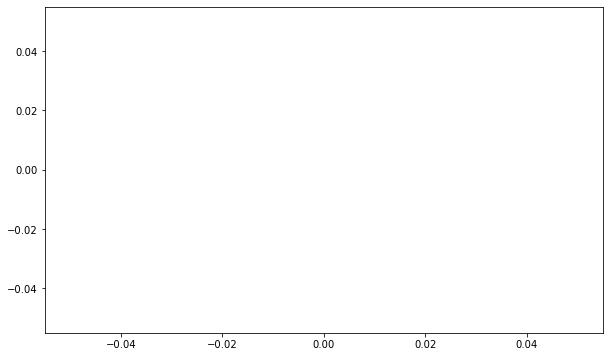

/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111111111098)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


Best Param: -0.011111111111110997, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111111111014)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


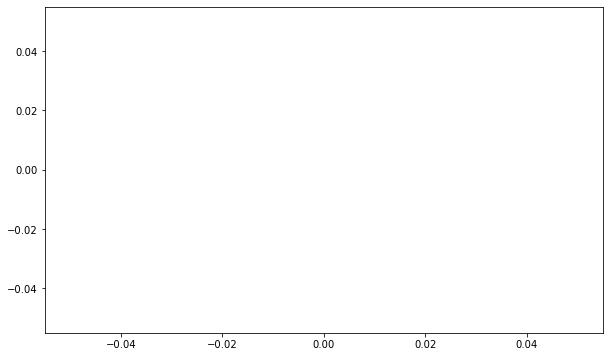

Best Param: -0.011111111111111098, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.011111111111111108)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


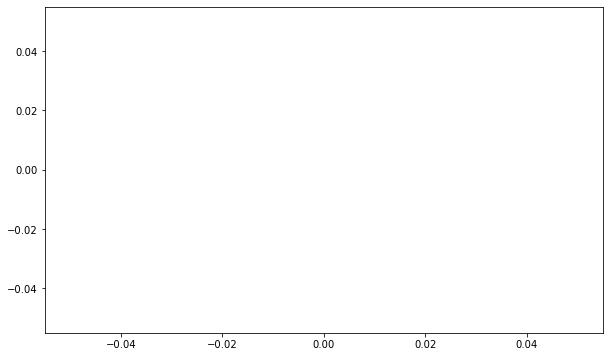

Best Param: -0.011111111111111108, Best Score: nan


/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-0.01111111111111111)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hindy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

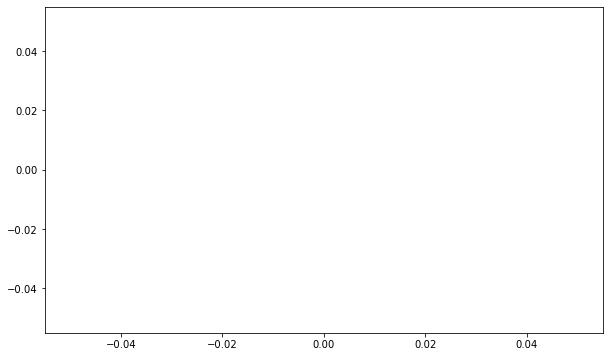

Best Param: -0.01111111111111111, Best Score: nan


ValueError: max() arg is an empty sequence

In [36]:
def tune(lower, upper, inter, X, y, cv):
    while True:
        score = {}
        for n in np.arange(lower, upper, inter):
            model = LogisticRegression(C=n, max_iter=1000)
            score[n] = (cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

        best_param = max(score, key=score.get)
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(score.keys(), score.values())
        plt.vlines(best_param,
                   ymin=min(score.values()),
                   ymax=max(score.values()),
                   linestyles='--',
                   color='black')
        plt.show()

        print(f'Best Param: {best_param}, Best Score: {max(score.values())}')
   
        lower, upper, inter = best_param - inter, best_param + inter, inter/10
        if inter == 1:
            print('Done Searching.')
            break

tune(.000, 1, .01, X_train, y_train, 5)

lower: 0.0001
upper: 1
inter: 0.01


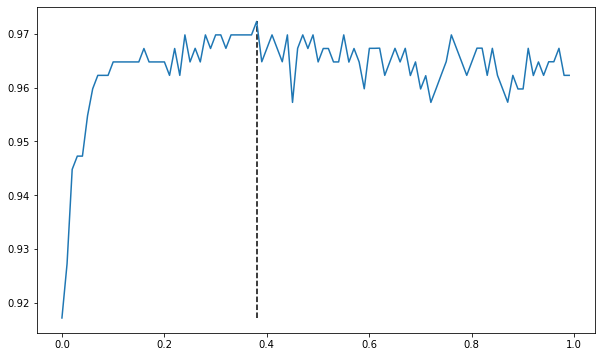

lower: 0.3701
upper: 0.3901
inter: 0

Best Param: 0.3801, Best Score: 0.9723101265822784
Done Searching.


In [49]:
def tune(lower, upper, inter, X, y, cv):
    while True:
        print(f'lower: {lower}')
        print(f'upper: {upper}')
        print(f'inter: {inter}')
        score = {}
        for n in np.arange(lower, upper, inter):
            model = XGBClassifier(n_estimators=120, max_depth=2, learning_rate=0.3801, use_label_encoder=False, eval_metric='logloss')
            score[n] = (cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

        best_param = max(score, key=score.get)
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(score.keys(), score.values())
        plt.vlines(best_param,
                   ymin=min(score.values()),
                   ymax=max(score.values()),
                   linestyles='--',
                   color='black')
        plt.show()
        
        lower = best_param - inter
        upper = best_param + inter
        inter = int(inter/10)
        
        if inter == 1 or inter == 0:
            print(f'lower: {lower}')
            print(f'upper: {upper}')
            print(f'inter: {inter}')
            print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
            print('Done Searching.')
            break
        
        print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
        
tune(.0001, 1, .01, X_train, y_train, 5)

lower: 0.0001
upper: 1
inter: 0.01


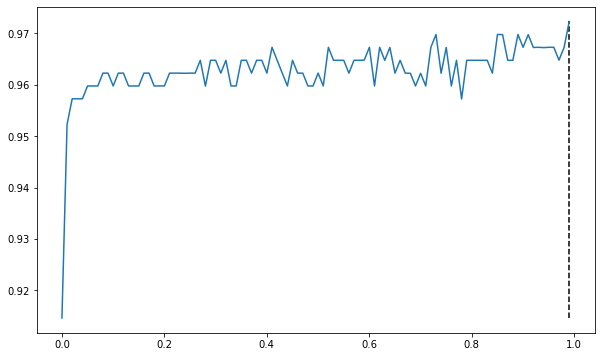

lower: 0.9801
upper: 1.0001
inter: 0

Best Param: 0.9901, Best Score: 0.9723417721518988
Done Searching.


In [52]:
def tune(lower, upper, inter, X, y, cv):
    while True:
        print(f'lower: {lower}')
        print(f'upper: {upper}')
        print(f'inter: {inter}')
        score = {}
        for n in np.arange(lower, upper, inter):
            model = AdaBoostClassifier(n_estimators=510, learning_rate=0.9901)
            score[n] = (cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

        best_param = max(score, key=score.get)
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(score.keys(), score.values())
        plt.vlines(best_param,
                   ymin=min(score.values()),
                   ymax=max(score.values()),
                   linestyles='--',
                   color='black')
        plt.show()
        
        lower = best_param - inter
        upper = best_param + inter
        inter = int(inter/10)
        
        if inter == 1 or inter == 0:
            print(f'lower: {lower}')
            print(f'upper: {upper}')
            print(f'inter: {inter}')
            print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
            print('Done Searching.')
            break
        
        print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
        
tune(.0001, 1, .01, X_train, y_train, 5)

lower: 1
upper: 16
inter: 1


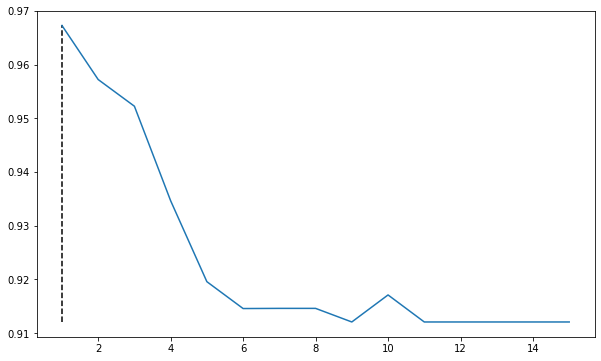

lower: 0
upper: 2
inter: 0

Best Param: 1, Best Score: 0.9672784810126582
Done Searching.


In [54]:
def tune(lower, upper, inter, X, y, cv):
    while True:
        print(f'lower: {lower}')
        print(f'upper: {upper}')
        print(f'inter: {inter}')
        score = {}
        for n in np.arange(lower, upper, inter):
            model = GradientBoostingClassifier(n_estimators=390, max_depth=n)
            score[n] = (cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

        best_param = max(score, key=score.get)
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(score.keys(), score.values())
        plt.vlines(best_param,
                   ymin=min(score.values()),
                   ymax=max(score.values()),
                   linestyles='--',
                   color='black')
        plt.show()
        
        lower = best_param - inter
        upper = best_param + inter
        inter = int(inter/10)
        
        if inter == 1 or inter == 0:
            print(f'lower: {lower}')
            print(f'upper: {upper}')
            print(f'inter: {inter}')
            print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
            print('Done Searching.')
            break
        
        print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
        
tune(1, 16, 1, X_train, y_train, 5)

lower: 1
upper: 100
inter: 1


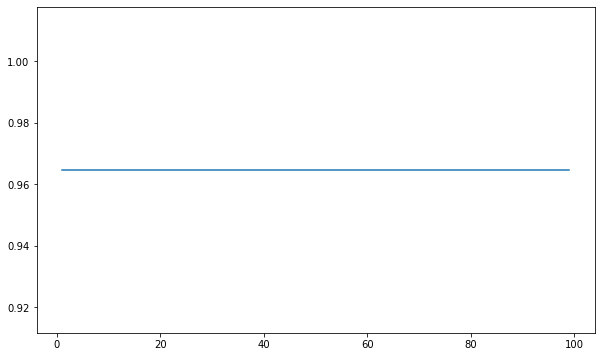

lower: 0
upper: 2
inter: 0

Best Param: 1, Best Score: 0.9647784810126583
Done Searching.


In [56]:
def tune(lower, upper, inter, X, y, cv):
    while True:
        print(f'lower: {lower}')
        print(f'upper: {upper}')
        print(f'inter: {inter}')
        score = {}
        for n in np.arange(lower, upper, inter):
            model = KNeighborsClassifier(n_neighbors=8, leaf_size=n)
            score[n] = (cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

        best_param = max(score, key=score.get)
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(score.keys(), score.values())
        plt.vlines(best_param,
                   ymin=min(score.values()),
                   ymax=max(score.values()),
                   linestyles='--',
                   color='black')
        plt.show()
        
        lower = best_param - inter
        upper = best_param + inter
        inter = int(inter/10)
        
        if inter == 1 or inter == 0:
            print(f'lower: {lower}')
            print(f'upper: {upper}')
            print(f'inter: {inter}')
            print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
            print('Done Searching.')
            break
        
        print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
        
tune(1, 100, 1, X_train, y_train, 5)

lower: 1
upper: 16
inter: 1


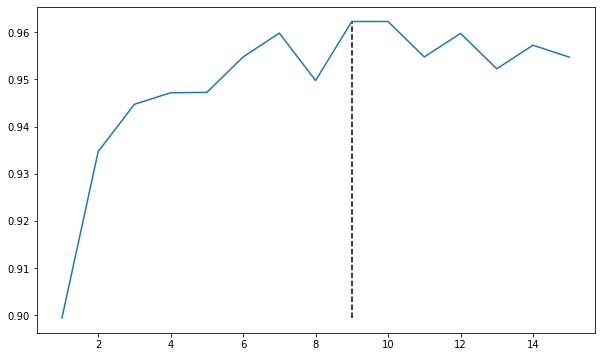

lower: 8
upper: 10
inter: 0

Best Param: 9, Best Score: 0.9622784810126582
Done Searching.


In [58]:
def tune(lower, upper, inter, X, y, cv):
    while True:
        print(f'lower: {lower}')
        print(f'upper: {upper}')
        print(f'inter: {inter}')
        score = {}
        for n in np.arange(lower, upper, inter):
            model = RandomForestClassifier(n_estimators=160, max_depth=9)
            score[n] = (cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

        best_param = max(score, key=score.get)
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(score.keys(), score.values())
        plt.vlines(best_param,
                   ymin=min(score.values()),
                   ymax=max(score.values()),
                   linestyles='--',
                   color='black')
        plt.show()
        
        lower = best_param - inter
        upper = best_param + inter
        inter = int(inter/10)
        
        if inter == 1 or inter == 0:
            print(f'lower: {lower}')
            print(f'upper: {upper}')
            print(f'inter: {inter}')
            print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
            print('Done Searching.')
            break
        
        print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
        
tune(1, 16, 1, X_train, y_train, 5)

lower: 1
upper: 16
inter: 1


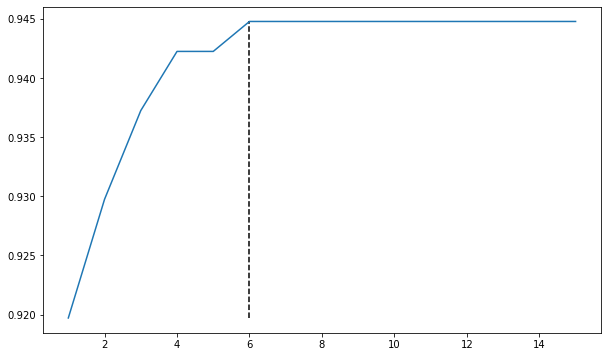

lower: 5
upper: 7
inter: 0

Best Param: 6, Best Score: 0.9447784810126582
Done Searching.


In [61]:
def tune(lower, upper, inter, X, y, cv):
    while True:
        print(f'lower: {lower}')
        print(f'upper: {upper}')
        print(f'inter: {inter}')
        score = {}
        for n in np.arange(lower, upper, inter):
            model = XGBRFClassifier(n_estimators=140, max_depth=n, use_label_encoder=False, eval_metric='logloss')
            score[n] = (cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

        best_param = max(score, key=score.get)
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(score.keys(), score.values())
        plt.vlines(best_param,
                   ymin=min(score.values()),
                   ymax=max(score.values()),
                   linestyles='--',
                   color='black')
        plt.show()
        
        lower = best_param - inter
        upper = best_param + inter
        inter = int(inter/10)
        
        if inter == 1 or inter == 0:
            print(f'lower: {lower}')
            print(f'upper: {upper}')
            print(f'inter: {inter}')
            print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
            print('Done Searching.')
            break
        
        print(f'\nBest Param: {best_param}, Best Score: {max(score.values())}')
        
tune(1, 16, 1, X_train, y_train, 5)

# Dimentionality Reduction with recursive feature selections

In [71]:
# re-instantiate the models with new hyperparameters
lr = LogisticRegression()
xgbc = XGBClassifier(n_estimators=120, max_depth=2, learning_rate=0.3801, use_label_encoder=False, eval_metric='logloss')
ada = AdaBoostClassifier(n_estimators=510, learning_rate=0.9901)
grad = GradientBoostingClassifier(n_estimators=390, max_depth=1)
knn = KNeighborsClassifier(n_neighbors=8)
rfc = RandomForestClassifier(n_estimators=160, max_depth=9)
xgbfc = XGBRFClassifier(n_estimators=140, max_depth=6, use_label_encoder=False, eval_metric='logloss')

 
Searching the best subset of features with LogisticRegression...
--------------------------------------------------------Trial Summary--------------------------------------------------------
Best Subset Found: 
     ['mean concave points', 'mean texture', 'worst perimeter', 'worst texture', 'worst symmetry', 'worst radius', 'mean compactness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'smoothness error', 'mean perimeter', 'compactness error', 'mean concavity', 'mean radius', 'concavity error', 'worst area', 'symmetry error', 'worst compactness', 'worst concavity', 'fractal dimension error', 'mean area']
 
Best Accuracy: 
     0.9799
 
Total Time Spent: 8.23(s)


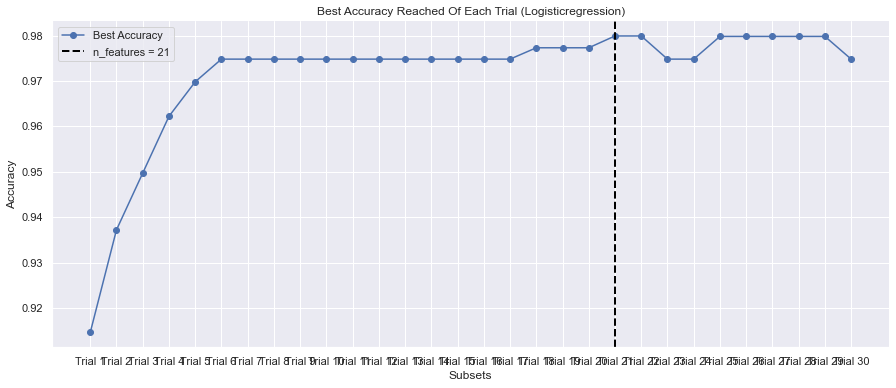

--------------------------------End of Recursive Features Selection (LogisticRegression)-------------------------------
 
Searching the best subset of features with XGBClassifier...
--------------------------------------------------------Trial Summary--------------------------------------------------------
Best Subset Found: 
     ['mean concave points', 'worst texture', 'worst radius', 'mean area', 'mean radius', 'mean perimeter', 'worst fractal dimension', 'mean texture', 'compactness error', 'mean compactness', 'area error', 'worst concavity', 'mean concavity', 'concavity error', 'mean symmetry', 'texture error', 'worst perimeter', 'mean fractal dimension']
 
Best Accuracy: 
     0.9824
 
Total Time Spent: 177.82(s)


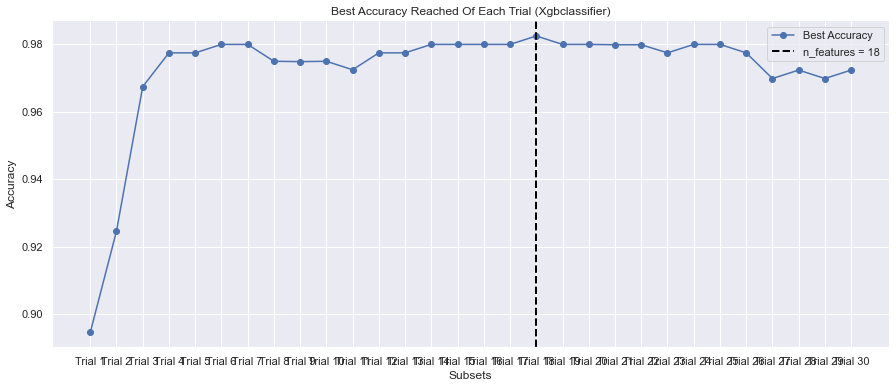

--------------------------------End of Recursive Features Selection (XGBClassifier)-------------------------------
 
Searching the best subset of features with AdaBoostClassifier...
--------------------------------------------------------Trial Summary--------------------------------------------------------
Best Subset Found: 
     ['worst perimeter', 'worst concave points', 'compactness error', 'mean texture', 'concavity error', 'mean concavity', 'radius error', 'mean radius', 'worst texture', 'worst area', 'mean perimeter', 'worst smoothness', 'mean area', 'mean concave points', 'concave points error']
 
Best Accuracy: 
     0.9824
 
Total Time Spent: 450.18(s)


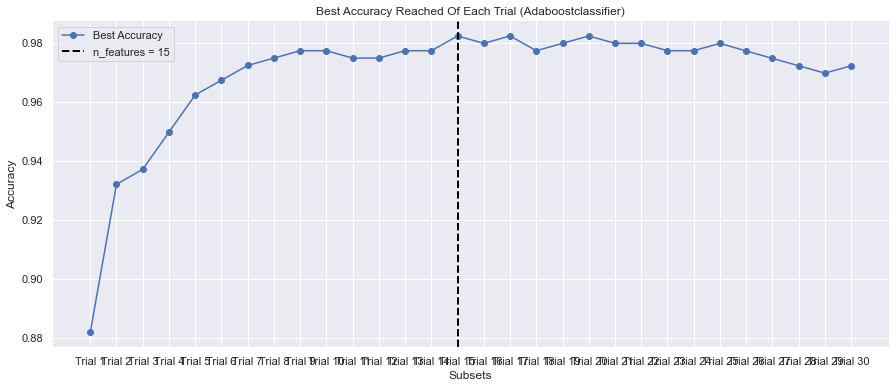

--------------------------------End of Recursive Features Selection (AdaBoostClassifier)-------------------------------
 
Searching the best subset of features with KNeighborsClassifier...
--------------------------------------------------------Trial Summary--------------------------------------------------------
Best Subset Found: 
     ['mean concave points', 'worst texture', 'worst perimeter', 'worst symmetry', 'area error', 'mean symmetry', 'texture error', 'radius error', 'worst concavity', 'mean perimeter', 'mean area']
 
Best Accuracy: 
     0.9748
 
Total Time Spent: 455.7(s)


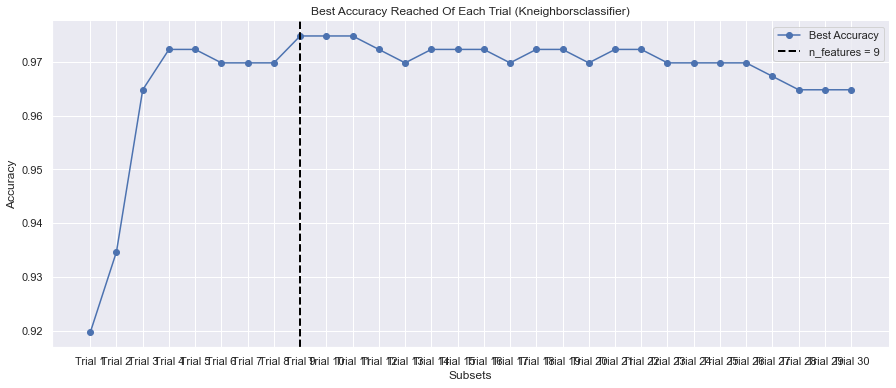

--------------------------------End of Recursive Features Selection (KNeighborsClassifier)-------------------------------
 
Searching the best subset of features with RandomForestClassifier...
--------------------------------------------------------Trial Summary--------------------------------------------------------
Best Subset Found: 
     ['worst perimeter', 'worst smoothness', 'worst texture', 'worst radius', 'mean perimeter', 'mean fractal dimension', 'concave points error', 'mean area', 'mean texture']
 
Best Accuracy: 
     0.9724
 
Total Time Spent: 535.45(s)


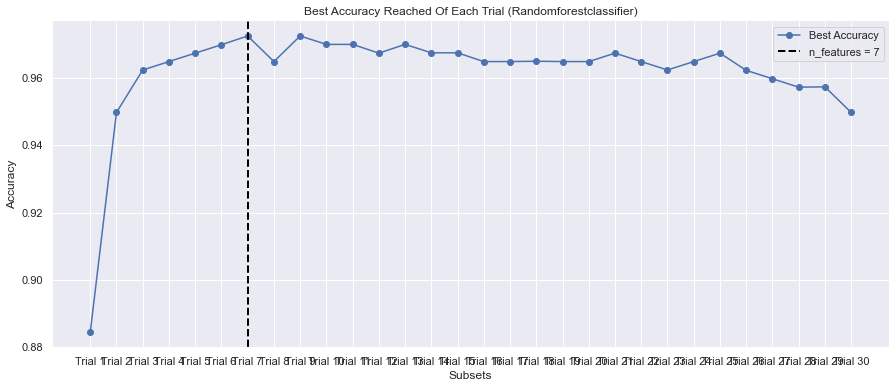

--------------------------------End of Recursive Features Selection (RandomForestClassifier)-------------------------------
 
Searching the best subset of features with XGBRFClassifier...
--------------------------------------------------------Trial Summary--------------------------------------------------------
Best Subset Found: 
     ['mean concave points', 'mean texture', 'worst radius', 'mean radius', 'worst texture', 'worst concave points', 'worst area', 'worst fractal dimension', 'mean perimeter', 'mean smoothness']
 
Best Accuracy: 
     0.9699
 
Total Time Spent: 953.95(s)


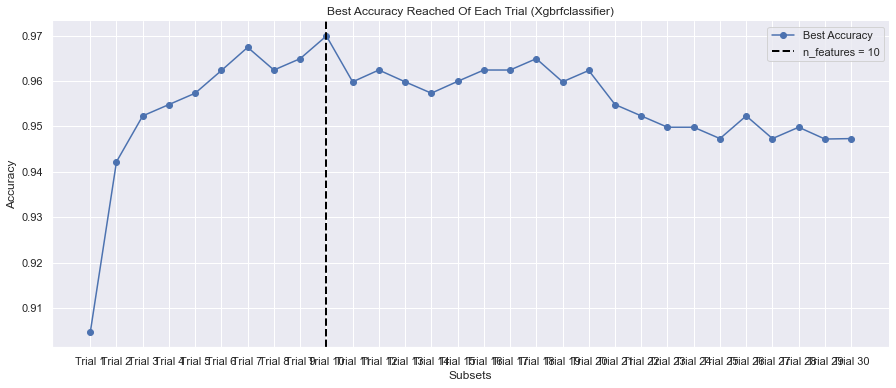

--------------------------------End of Recursive Features Selection (XGBRFClassifier)-------------------------------


In [72]:
from RecursiveFeatureSelector import RecursiveFeatureSelector
rfs = RecursiveFeatureSelector()
rfs.fit(X_train, y_train)
rfs.search([lr, xgbc, ada, knn, rfc, xgbfc], 5, 'accuracy', tolerance=999, verbose=2)

In [78]:
acc=pd.DataFrame({'lr':0.9799, 'xgbc':0.9824, 'ada':0.9824, 'knn':0.9748, 'rfr':0.9724, 'xgbrfc':0.9699}, index=['acc']).T
acc.sort_values('acc', ascending=False, inplace=True)

In [79]:
acc

,acc
xgbc,0.9824
ada,0.9824
lr,0.9799
knn,0.9748
rfr,0.9724
xgbrfc,0.9699


all the model got slight improvements with accuracy score.

In [102]:
# train the models with the selected features
xgbc.fit(X_train[rfs.best_subsets['XGBClassifier']], y_train)
ada.fit(X_train[rfs.best_subsets['AdaBoostClassifier']], y_train)
lr.fit(X_train[rfs.best_subsets['LogisticRegression']], y_train)
knn.fit(X_train[rfs.best_subsets['KNeighborsClassifier']], y_train)
rfc.fit(X_train[rfs.best_subsets['RandomForestClassifier']], y_train)
xgbfc.fit(X_train[rfs.best_subsets['XGBRFClassifier']], y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, eval_metric='logloss', gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=140, n_jobs=8,
                num_parallel_tree=140, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', use_label_encoder=False,
                validate_parameters=1, verbosity=None)

In [103]:
xgbc_pred = xgbc.predict(X_test[rfs.best_subsets['XGBClassifier']])
ada_pred = ada.predict(X_test[rfs.best_subsets['AdaBoostClassifier']])
lr_pred = lr.predict(X_test[rfs.best_subsets['LogisticRegression']])
knn_pred = knn.predict(X_test[rfs.best_subsets['KNeighborsClassifier']])
rfc_pred = rfc.predict(X_test[rfs.best_subsets['RandomForestClassifier']])
xgbfc_pred = xgbfc.predict(X_test[rfs.best_subsets['XGBRFClassifier']])

In [104]:
fin_pred = pd.DataFrame([xgbc_pred, ada_pred, lr_pred, knn_pred, rfc_pred, xgbfc_pred]).mode().T[0]

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test, fin_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

